In [1]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.pipelines import price_model
from scripts.predict import future_price_prediction
from scripts.lstm import LSTMModel
from scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn

In [3]:
scaler = StandardScaler()
model_type = LSTMModel
criterion = CustomizedLoss()

In [4]:
# 📂 Load dataset
file_path_1 = "../ready_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1)

Epoch 1 - Train_Loss: 149.92179507488623 - Test_Loss: 98.8869857788086
Overall Average Training Loss: 149.9218
torch.Size([1, 5, 1])
Final Evaluation Loss on Test Set: 129.9871
RMSE: 119.5786, MAE: 104.1780, R²: -229.7065, Directional Accuracy: 0.0000


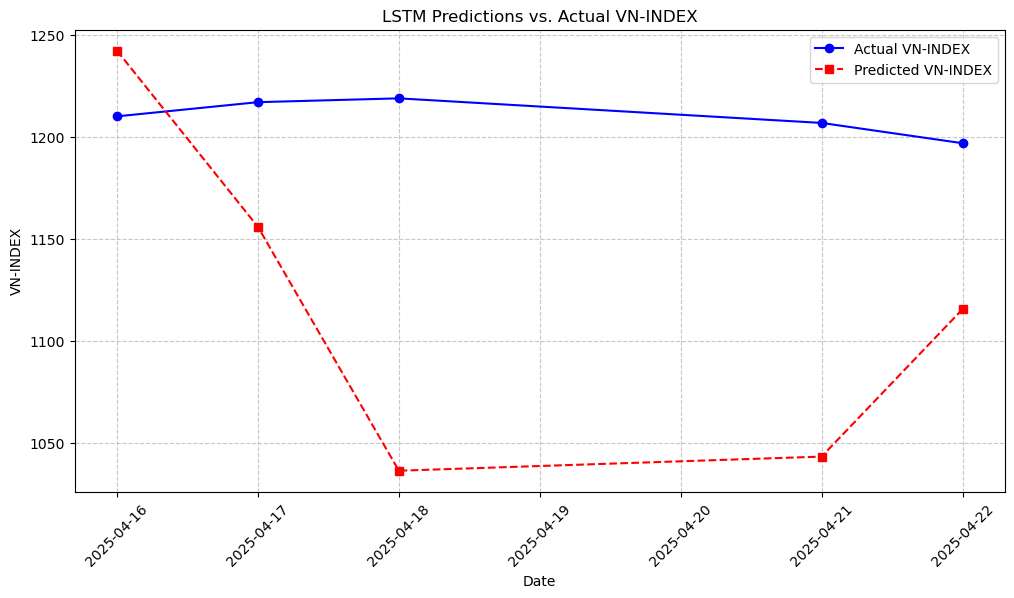

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-16      1210.300049         1242.472534
1 2025-04-17      1217.250000         1156.090210
2 2025-04-18      1219.119995         1036.549805
3 2025-04-21      1207.070068         1043.477417
4 2025-04-22      1197.130005         1115.734985
Epoch 1 - Train_Loss: 149.86161251675406
torch.Size([1, 5, 1])


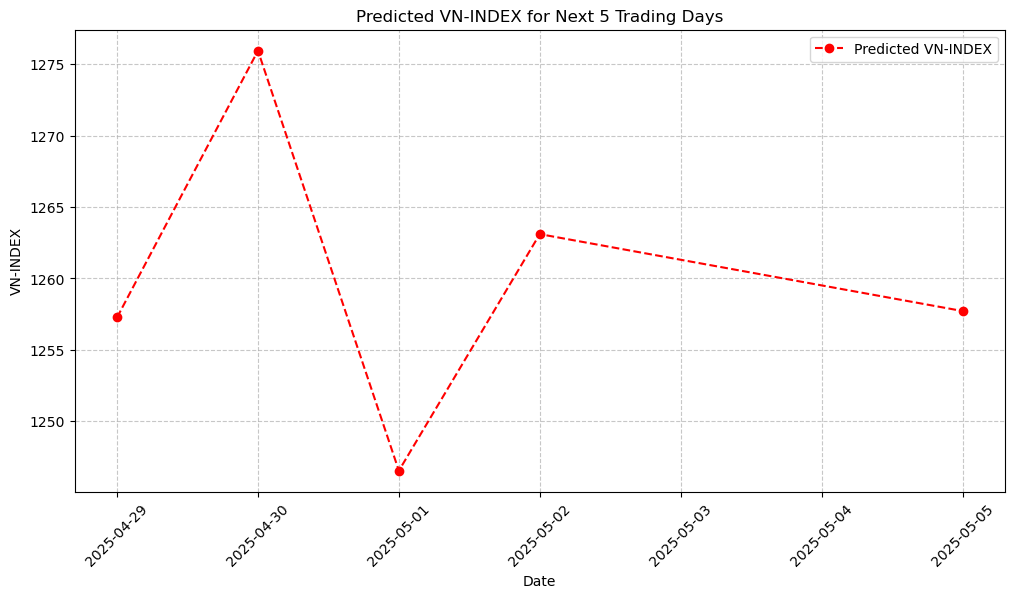

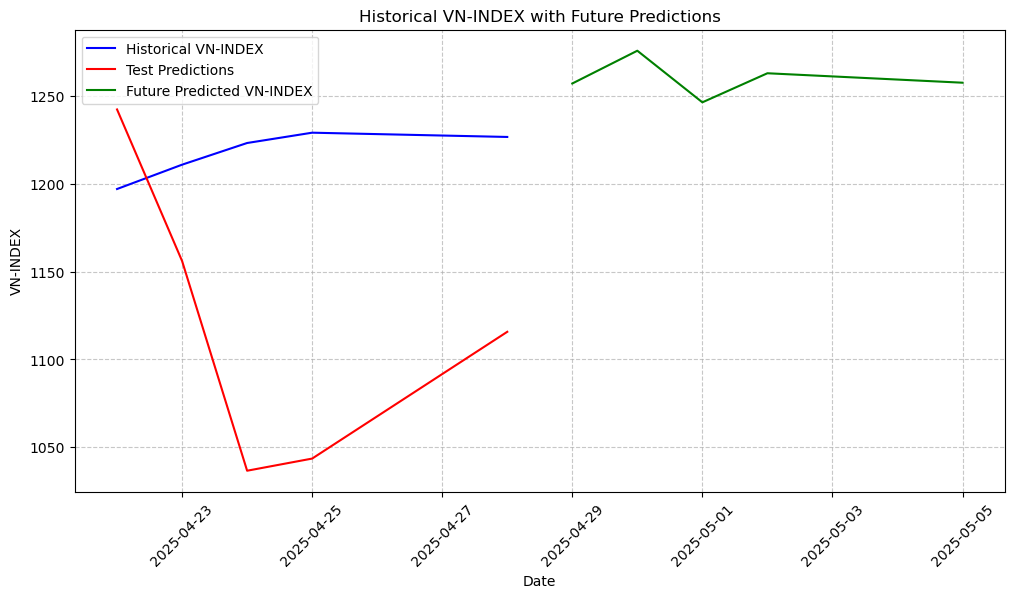

        Date  Predicted VN-INDEX
0 2025-04-29         1257.270874
1 2025-04-30         1275.950562
2 2025-05-01         1246.536987
3 2025-05-02         1263.106934
4 2025-05-05         1257.721191


In [5]:
# 📊 Select only VN-INDEX for prediction
data = df_1[["VN_Index_Close", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']]

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=5)

In [6]:
# 📊 Select additional VN-INDEX statistics for prediction
data = df_1

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

[I 2025-04-29 17:42:40,384] A new study created in memory with name: no-name-597bcdf6-e957-4598-b5b9-6f29b7ce1600
/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4853678695991452 and num_layers=1
  warnings.warn(


Epoch 1 - Train_Loss: 112.91658030209322 - Test_Loss: 91.1939926147461
Epoch 2 - Train_Loss: 75.0421327458081 - Test_Loss: 51.232810974121094
Epoch 3 - Train_Loss: 77.25383069242187 - Test_Loss: 326.01141357421875
Epoch 4 - Train_Loss: 70.40748844461993 - Test_Loss: 189.1128387451172
Epoch 5 - Train_Loss: 63.85120600257883 - Test_Loss: 228.44815063476562


[W 2025-04-29 17:43:37,747] Trial 0 failed with parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.4853678695991452, 'learning_rate': 0.0001495603647829266, 'batch_size': 8} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/Users/thangnguyen/Documents/GitHub/vn_index/scripts/pipelines.py", line 159, in <lambda>
    study.optimize(lambda trial: objective(model_type, trial, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, criterion, scaler), n_trials=10)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/thangnguyen/Documents/GitHub/vn_index/scripts/training_evaluation.py", line 80, in objective
    model, overall_avg_loss = train_model(model_

KeyboardInterrupt: 

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1[["VN_Index_Close", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']], ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📂 Load dataset
file_path_2 = "../ready_data/vn_index_external_data.csv"
df_2 = pd.read_csv(file_path_2)
df_2 = quicky_data(df_2)

In [ ]:
data = df_2

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_2, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_2, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📂 Load dataset
file_path_3 = "../ready_data/vn_index_merged_data.csv"
df_3 = pd.read_csv(file_path_3)
df_3 = quicky_data(df_3)

In [ ]:
data = df_3

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, df_3.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)